# Time Series Data Wrangling

In [1]:
import numpy as np
import pandas as pd

In [80]:
# date column to be parsed as a date field.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date']) 
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [17]:
type(df)

pandas.core.frame.DataFrame

In [34]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [3]:
df.shape

(204, 2)

In [11]:
# Adding additional col with value from previous years
df['prev_value'] = df['value'].shift()
df.dropna()

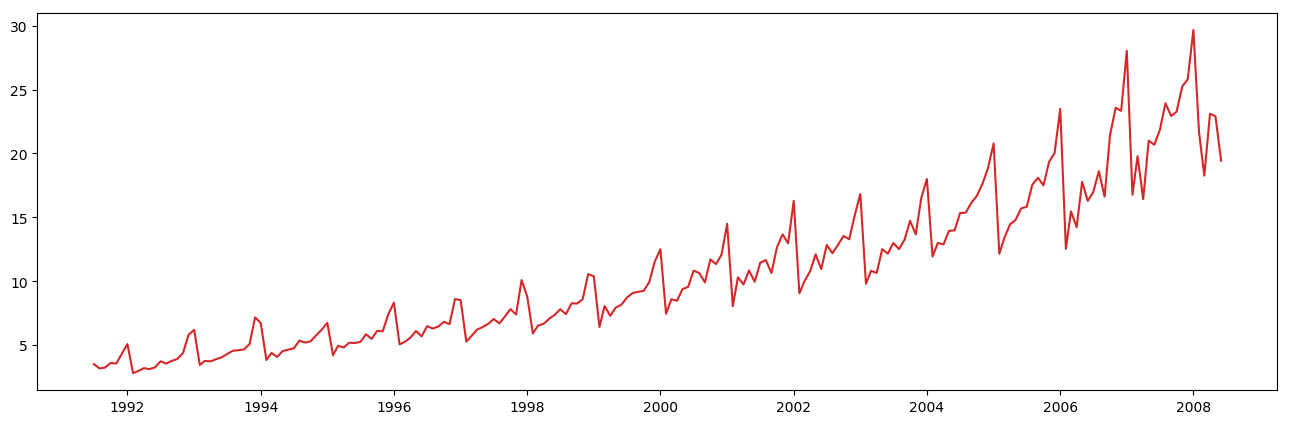

In [58]:
# Visualize time series plot
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=100)
    plt.plot(x, y, color='tab:red')
    plt.show()
    
plot_df(df, x=df.date, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

### Feature Engineering

In [85]:
# Extract the year and month from the date column
df['year'] = [d.year for d in df.date]
df['month'] = [d.month for d in df.date]
df['month_name'] = [d.strftime('%b') for d in df.date]

In [88]:
years = df['year'].unique()
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [92]:
for x,y in enumerate(years):
    print(x, y)

0 1991
1 1992
2 1993
3 1994
4 1995
5 1996
6 1997
7 1998
8 1999
9 2000
10 2001
11 2002
12 2003
13 2004
14 2005
15 2006
16 2007
17 2008


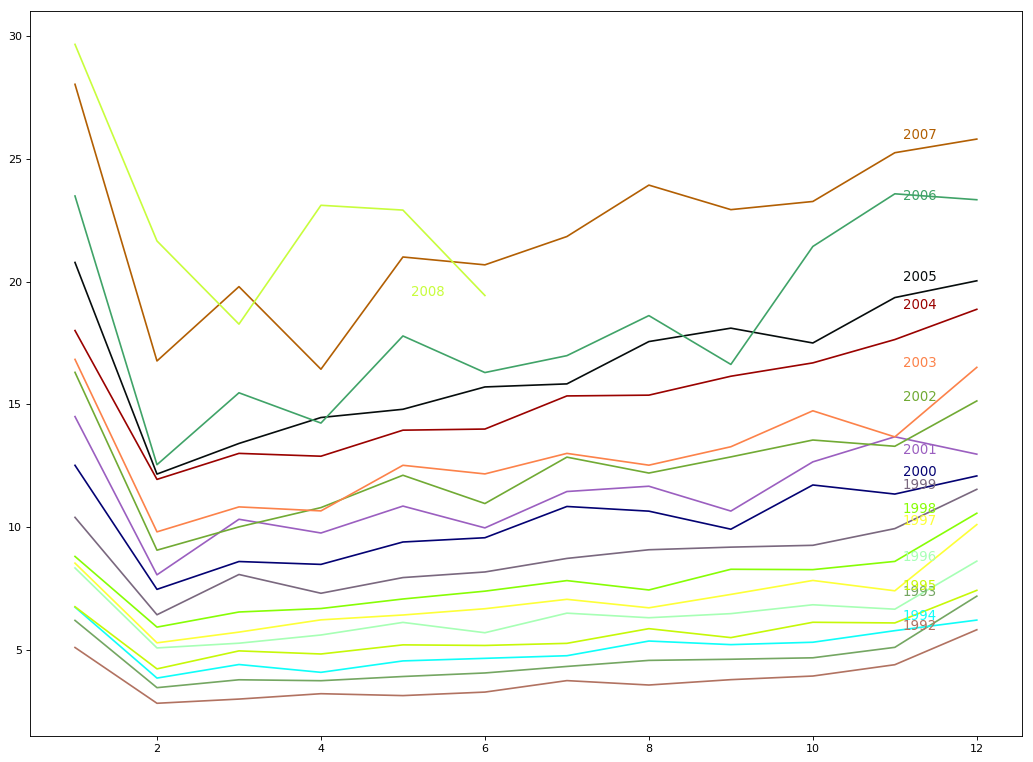

In [100]:
import matplotlib as mpl
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :],  color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])


## Panel Data

In [63]:
#Panel data = time series data with additional features measured for same time period
df2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df2.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
5,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,January-2013
6,ABOHAR(PB),January,2014,440,1025,1481,1256,PB,ABOHAR,January-2014
7,ABOHAR(PB),January,2015,1305,1309,1858,1613,PB,ABOHAR,January-2015
8,ABOHAR(PB),February,2005,1400,286,365,324,PB,ABOHAR,February-2005
9,ABOHAR(PB),February,2006,1800,343,411,380,PB,ABOHAR,February-2006


# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

# Notes: 
- Applying a rolling window to the data can also help to visualize seasonality on different time scales. 
- Other techniques for analyzing seasonality include autocorrelation plots, which plot the correlation coefficients of the time series with itself at different time lags.
- Time series with strong seasonality can often be well represented with models (by decompose the signal into seasonality and a long-term trend)
- A stationary time series is one whose statistical properties (such as mean and variance) don't change over time. These time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

In [109]:
# to convert given time based on specific format
pd.to_datetime('06/05/2020', format='%d/%m/%Y')

Timestamp('2020-05-06 00:00:00')

In [118]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")

In [ ]:
data.info()

In [119]:
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [120]:
data.shape

(4383, 5)

In [121]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [123]:
# to explicitly convert the date column to type DATETIME
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [124]:
data = data.set_index('Date')
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [127]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Observe carefully, freq = None means it is not known if data is collected by the hour, by day, my minute, etc. Just by looking we can see it looks like by the day

In [129]:
opsd_daily = pd.read_csv(url, sep = ",", parse_dates=['Date'])
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [130]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [132]:
opsd_daily.index

RangeIndex(start=0, stop=4383, step=1)

In [135]:
# Extract the year, month, date separately using the index set
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday_Name'] = data.index.weekday_name

In [143]:
data.sample(5, random_state = 0) # setting random state so the results are reproducible; i.e. gives same result on each run

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-03-29,1438.405,NaN,NaN,NaN,2006,3,Wednesday
2006-11-23,1552.044,NaN,NaN,NaN,2006,11,Thursday
2009-11-03,1430.793,NaN,NaN,NaN,2009,11,Tuesday
2015-08-11,1384.070,79.877,166.506,246.383,2015,8,Tuesday
2006-06-14,1352.012,NaN,NaN,NaN,2006,6,Wednesday


## Time-based Indexing

intuitively access data by just specifying year or month to the `loc` accessor

In [148]:
data.loc['2006']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2006-12-27,1284.676,NaN,NaN,NaN,2006,12,Wednesday
2006-12-28,1314.603,NaN,NaN,NaN,2006,12,Thursday
2006-12-29,1274.646,NaN,NaN,NaN,2006,12,Friday


In [151]:
data.loc['2006-01-01':'2006-01-05'] # range of dates

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


## Partial string indexing

In [153]:
# data for month of may in 2006
data.loc['2006-05']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-05-01,986.698,NaN,NaN,NaN,2006,5,Monday
2006-05-02,1329.821,NaN,NaN,NaN,2006,5,Tuesday
2006-05-03,1348.188,NaN,NaN,NaN,2006,5,Wednesday
2006-05-04,1348.343,NaN,NaN,NaN,2006,5,Thursday
2006-05-05,1330.520,NaN,NaN,NaN,2006,5,Friday
2006-05-06,1115.442,NaN,NaN,NaN,2006,5,Saturday
2006-05-07,998.308,NaN,NaN,NaN,2006,5,Sunday
2006-05-08,1321.782,NaN,NaN,NaN,2006,5,Monday
2006-05-09,1353.229,NaN,NaN,NaN,2006,5,Tuesday


## Visualizing time series data

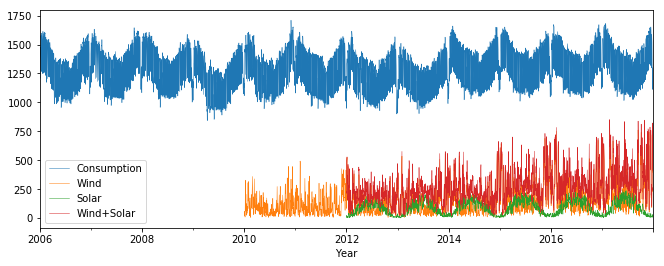

In [334]:
data[data_columns].plot(figsize=(11,4), linewidth=0.5)
plt.xlabel('Year')

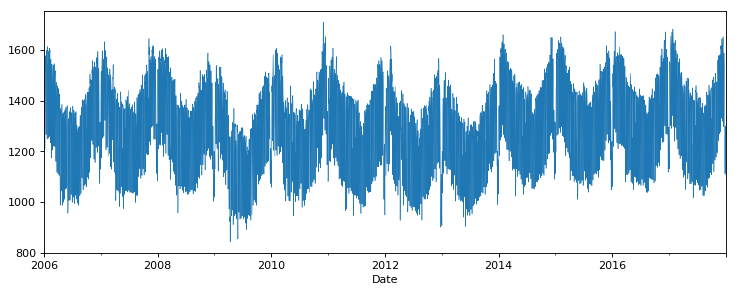

In [163]:
plt.figure(figsize=(11,4), dpi= 80)
data['Consumption'].plot(linewidth = 0.5)

The first thing to notice is that there is seasonality: winters (Jan, Dec) there's a big jump, summers (June, July) there is a low

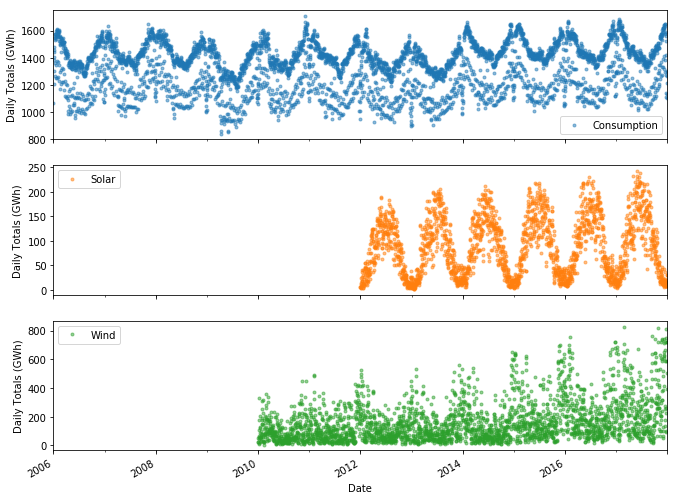

In [171]:
# plotting all the 3 columns onto same plot
cols = ['Consumption', 'Solar', 'Wind']

axes = data[cols].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

## Seasonality

#### patterns repeat again and again at regular time intervals

### Check seasonality corresponding with weekdays weekends

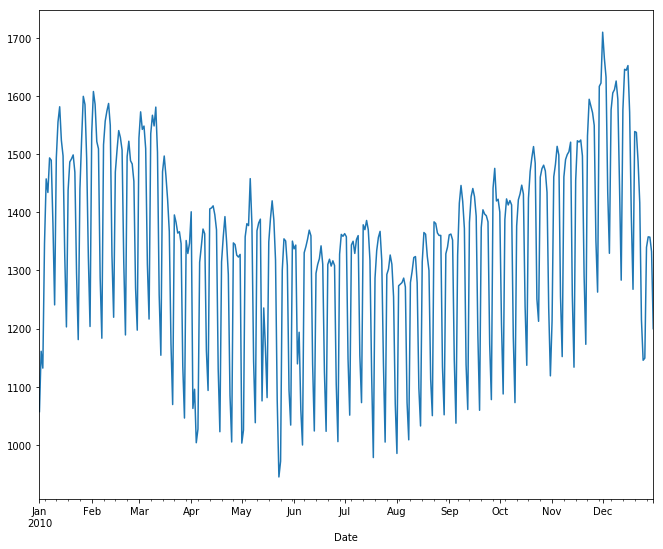

In [182]:
# check for single year
data.loc['2010','Consumption'].plot(figsize=(11, 9))

#### clearly see the weekly oscillations

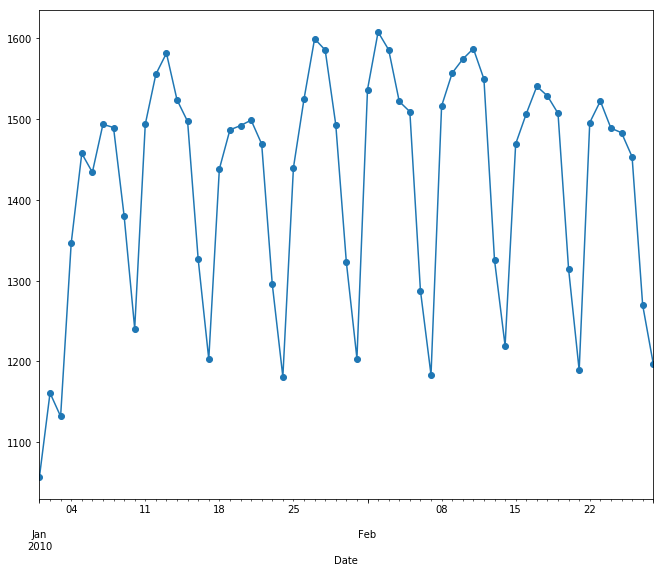

In [194]:
# check for two months in an year 2017
ax = data.loc['2010-01': '2010-02','Consumption'].plot(marker = 'o', figsize=(11, 9))


### Check seasonality by Month

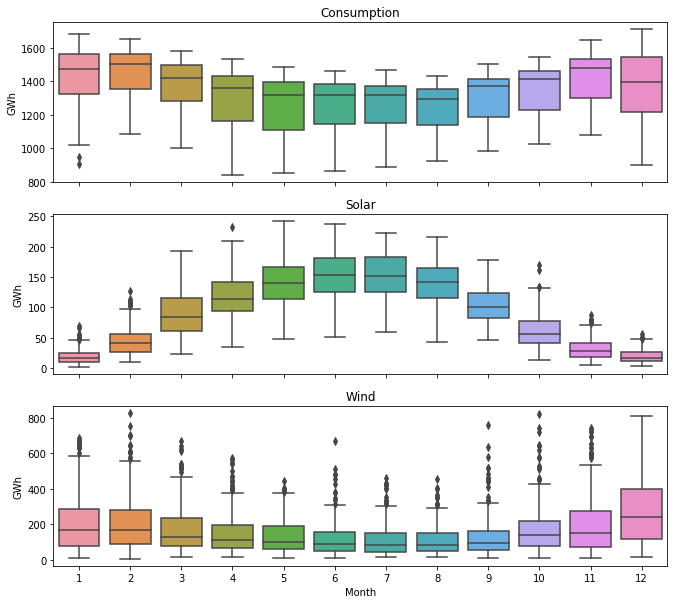

In [209]:
import seaborn as sns
#boxplots to see the seasonality wrt months
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Check seasonality by Weekday/weekend

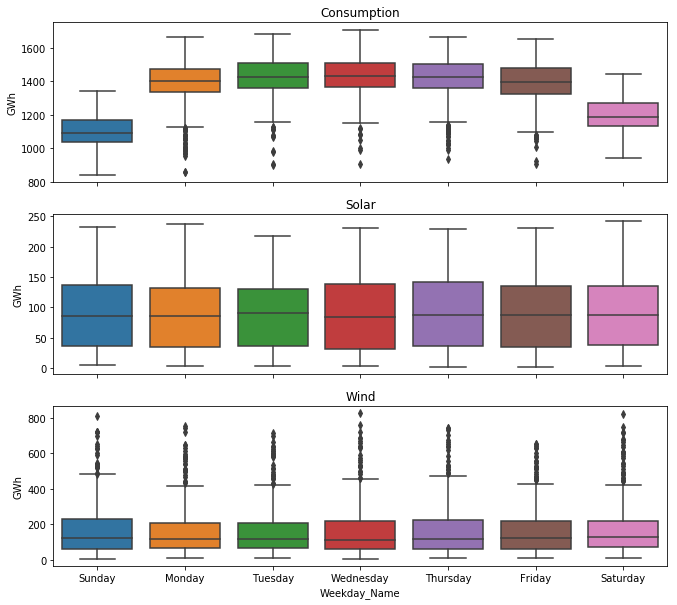

In [210]:
import seaborn as sns
#boxplots to see the seasonality wrt months
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Weekday_Name', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

Consumption is more on weekdays and low on weekends.

### Seasonal Patterns in time series data

Remove the trend (computed using `rolling().mean()`) from a time series, so that you can more easily investigate seasonality. 

To remove the trend, there is a method called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it)

**Differencing is super helpful in turning your time series into a stationary time series.** And a stationary time series is more or less similar to a sine curve, which can be easily modeled.

In [337]:
# creating the first order differencing data
data_first_order_diff = data[data_columns].diff()
data_first_order_diff

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,311.33700,NaN,NaN,NaN
2006-01-03,62.01200,NaN,NaN,NaN
2006-01-04,14.68400,NaN,NaN,NaN
2006-01-05,19.91400,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,133.82408,-322.946,-14.393,-337.339
2017-12-28,35.92307,111.917,-2.368,109.549
2017-12-29,-4.77645,77.853,15.692,93.545


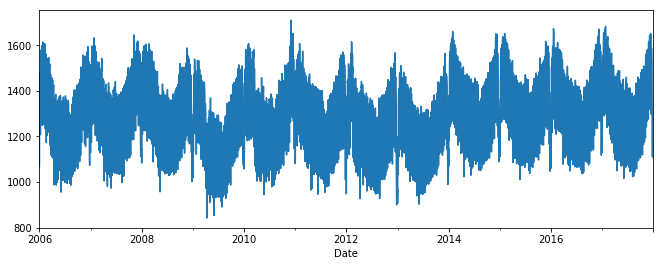

In [624]:
# plotting the first order difference of consumption to see the seasonality
data['Consumption'].plot(figsize = (11,4))

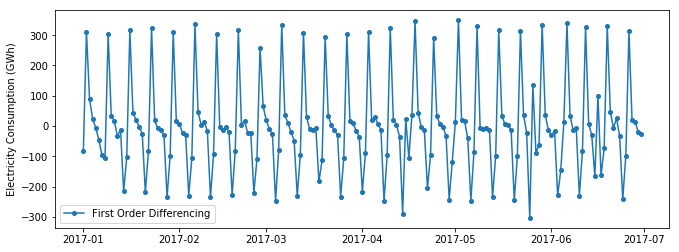

In [363]:
# plotting daily and weekly time series together over 6 month period
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(11, 4))
#ax.plot(data_365d.loc[start:end, 'Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# ax.plot(data.loc[start:end, 'Consumption'],
# marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_first_order_diff.loc[start:end, 'Consumption'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Electricity Consumption (GWh)')
ax.legend();

Very clear to see the peaks (at beginning of the week) and troughs (at end of week) now since the trends have been removed (values lie on either side of 0).  Beginning of the month, there is a huge spike of 300% or more in power consumption

If the trend has not been removed or it is still hard to see seasonality, we perform 2nd order differencing. i.e. difference between current point and 2 points preceeding it  

## Frequencies

In [215]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

Notice how the freq = 'D' now representing a day.

Available frequencies in pandas include hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'), and many others.

In [216]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [217]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [224]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = data.loc[times_sample, ['Consumption', 'Wind']].copy()
consum_sample

,Consumption,Wind
2013-02-03,1109.639,251.234
2013-02-06,1451.449,100.776
2013-02-08,1433.098,31.622


using `.asfreq` and `method = 'ffill'` to set the frequency of the time series as per day

In [235]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
consum_freq


,Consumption,Wind
2013-02-03,1109.639,251.234
2013-02-04,NaN,NaN
2013-02-05,NaN,NaN
2013-02-06,1451.449,100.776
2013-02-07,NaN,NaN
2013-02-08,1433.098,31.622


In [236]:

# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample['Consumption'].asfreq('D', method='ffill')
consum_freq

,Consumption,Wind,Consumption - Forward Fill
2013-02-03,1109.639,251.234,1109.639
2013-02-04,NaN,NaN,1109.639
2013-02-05,NaN,NaN,1109.639
2013-02-06,1451.449,100.776,1451.449
2013-02-07,NaN,NaN,1451.449
2013-02-08,1433.098,31.622,1433.098


## Imputing missing values

### Checking point in times for which data is not collected

In [254]:
## Looking at the data it seems it was collected at the fequence of each day, so explictly set it
data = data.asfreq(freq = 'D', method = "ffill")
data

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


Number of rows are unchanged so that means we had the data available for every day 

### Replace NAs in individual column with prev row's value - 

assumption, value remains unchanged 

In [259]:
data.ffill().head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


Still some NAs because no starting value is provided

## Resampling

Downsampling: Think of this as aggregating the data. For instance, if the current time series is per day, we can generate statistics by the month, or year. 

For example, computing monthly sales totals from daily data. 

We use the DataFrame’s `resample()` method, which splits the DatetimeIndex into time bins and groups the data by time bin.

### Weekly Resampling

In [274]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_weekly_mean = data[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


The first row above, labelled 2006-01-01, contains the mean of all the data contained in the time bin 2006-01-01 through 2006-01-07.

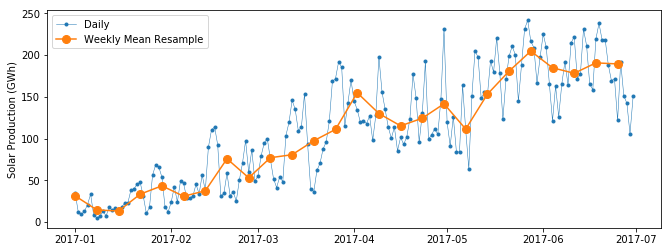

In [272]:
# plotting daily and weekly time series together over 6 month period
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(data.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

The orange line is much more smoother as it has been aggregated over the weeks (i.e. because higher frequency variability has been averaged out in the resampling.

### Monthly Resampling

In [279]:
# aggregating with sum totals 

# Compute the monthly sums, setting the value to NaN for any month which has fewer than 28 days of data
data_monthly = data[data_columns].resample('M').sum(min_count = 28)
data_monthly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.70400,NaN,NaN,NaN
2006-02-28,41078.99300,NaN,NaN,NaN
2006-03-31,43978.12400,NaN,NaN,NaN
2006-04-30,38251.76700,NaN,NaN,NaN
2006-05-31,38858.14300,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,40029.77368,5499.798,4602.808,10102.606
2017-09-30,40078.56092,6287.730,3079.291,9367.021
2017-10-31,42355.21893,12480.097,2130.557,14610.654


### Plotting monthly time series together by plotting the electricity consumption as a line plot, and the wind and solar power production together as a stacked area plot.

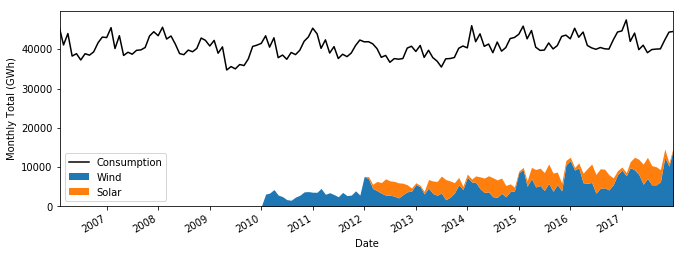

In [282]:
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data_monthly['Consumption'], color='black', label='Consumption')
data_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

Evident that electricity consumption has been fairly stable over time,

### Annual Resampling

In [291]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
data_annual = data[data_columns].resample('A').sum(min_count = 360)
data_annual

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.53600,NaN,NaN,NaN
2007-12-31,496631.84700,NaN,NaN,NaN
2008-12-31,495570.87600,NaN,NaN,NaN
2009-12-31,459737.42800,NaN,NaN,NaN
2010-12-31,488588.70000,35911.777,NaN,NaN
2011-12-31,484814.08600,44032.951,NaN,NaN
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


The indices does not need to be that long, keeping only the year would suffice.

Use `df.set_index()`

In [292]:
data_annual = data_annual.set_index(data_annual.index.year)
data_annual.index.name = "Year" # changing the index name from Date to Year
data_annual

,Consumption,Wind,Solar,Wind+Solar
Year,,,,
2006,489068.53600,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999
2013,463336.85300,47197.832,29559.780,76697.443
2014,504164.82100,51107.672,32498.307,83370.502


In [293]:
# compute ratio of consumption to production
data_annual['Wind+Solar/Consumption'] = data_annual['Wind+Solar'] / data_annual['Consumption']
data_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


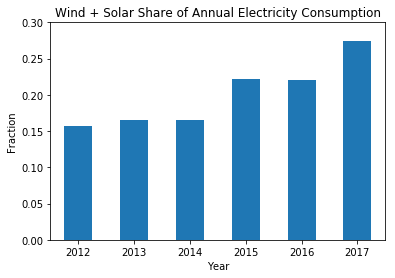

In [296]:
#plotting the bar plots for these ratios
ax = data_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

We can see that wind + solar production as a share of annual electricity consumption has been increasing from about 15% in 2012 to about 27% in 2017.

## Rolling Windows

Same as downsampling, but the windows (over which some aggregating functions are performed) are overlapping

### To compute the 3-day rolling mean of our daily data

window = 3 means 3 days; this is justified because our data is collected at an interval of 1 day. 

If data was collected monthly, then we window = 3 would mean a 3 month window.

In [306]:
# window = 3 means take mean over 3 days worth of data and 
# use the center=True argument to label each window at its midpoint, 
data_3d = data[data_columns].rolling(window = 3, center = True).mean()
data_3d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,1297.412667,NaN,NaN,NaN
2006-01-03,1426.757000,NaN,NaN,NaN
2006-01-04,1458.960333,NaN,NaN,NaN
2006-01-05,1445.925000,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1231.307240,539.461333,20.538333,559.999667
2017-12-28,1286.297473,495.069333,20.182000,515.251333
2017-12-29,1270.133493,603.982667,17.161000,621.143667


So the 2006-01-02 = 1297.412667 is obtained from averaging one prev and one next value in original dataset

In [307]:
data_7d = data[data_columns].rolling(window = 7, center = True).mean()
data_7d

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


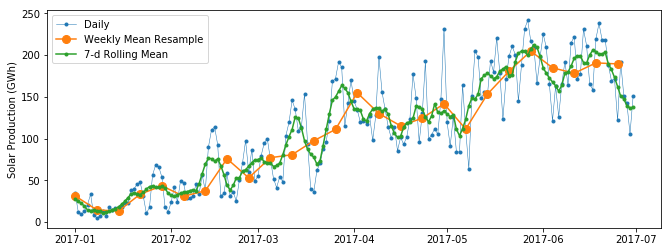

In [312]:
# Plotting daily, weekly and 7-day rolling time series together
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(data_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In the **rolling** mean time series, the peaks and troughs tend to **align closely** with the peaks and troughs of the daily time series.

In contrast, the peaks and troughs in the weekly **resampled** time series are **less closely aligned** with the daily time series, since the resampled time series is at a coarser granularity.

## Trends

In addition to the seasonality (brining higher variability), there exists trends which are slow, gradual variability exhibited by data.

An easy way to visualize these trends is with `rolling` means at different time scales.

Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.

In [325]:
data_365d = data[data_columns].rolling(window = 365, center = True, min_periods=360).mean()
data_365d.sample(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2016-06-19,1377.778595,212.075263,94.873592,306.948855
2011-01-01,1346.562751,105.540055,NaN,NaN
2014-09-02,1383.953211,149.381181,88.284482,238.084365
2007-10-11,1368.246340,NaN,NaN,NaN
2010-11-04,1342.219175,101.491504,NaN,NaN


### Yearly trends in power consumption

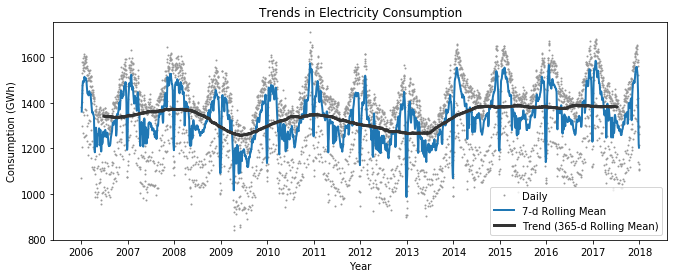

In [319]:
#plot the 7-day and 365-day rolling mean electricity consumption, along with the daily time series.
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
ax.plot(data_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(data_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

### Yearly trends in wind and solar production.

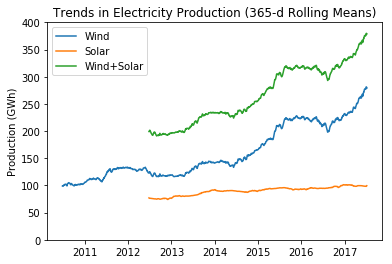

In [320]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(data_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');


We see a small increasing trend in solar power production and a large increasing trend in wind power production

## Periodicity and AutoCorrelation

Periodicity = Seasonality . A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Autocorrelation: If you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way. The correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

### Correlation between time series 1 and time series 2

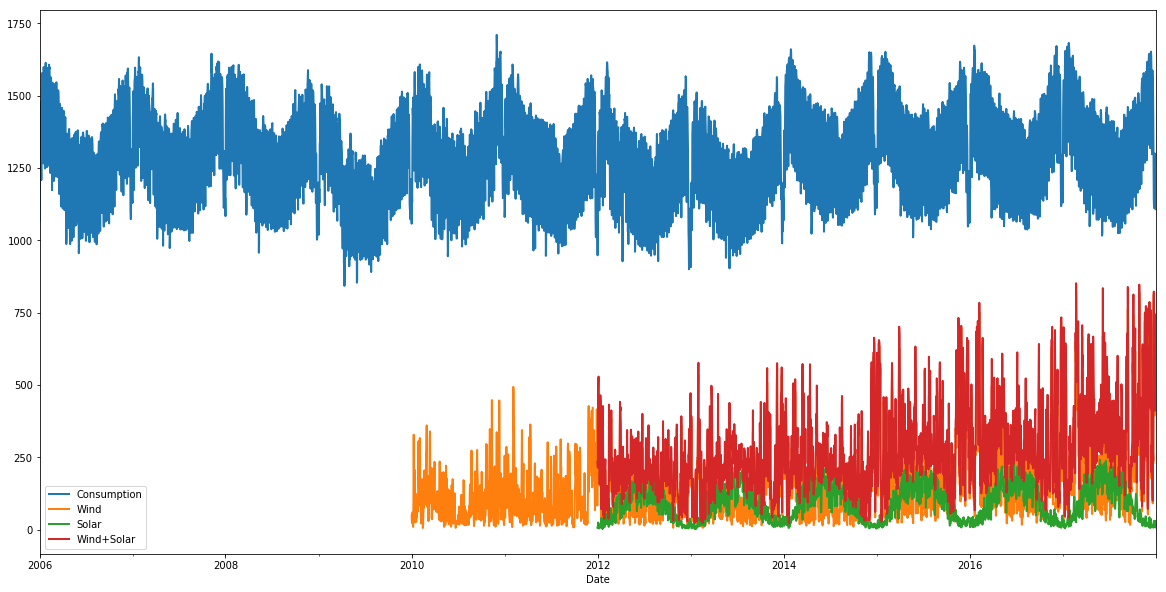

In [369]:
# plotting all the time series together
data[data_columns].plot(figsize=(20,10), linewidth=2, fontsize=10)

In [389]:
#Computing correlation coefficient of these time series
data[['Wind', 'Solar', 'Consumption']].corr()

,Wind,Solar,Consumption
Wind,1.000000,-0.308832,0.136821
Solar,-0.308832,1.000000,-0.278943
Consumption,0.136821,-0.278943,1.000000


Wind and solar are negatively correlated. BUT remember that we have a seasonal and a trend component. Also, looking at the plot above, their seasonal components could be positively correlated but nothing can be said about trends.

The actual correlation coefficient is actually capturing both of those.

Better way to capture the correlation is to measure correlation between seasonality,i.e. removing the trend. And **we can remove trend by differencing the time series.**

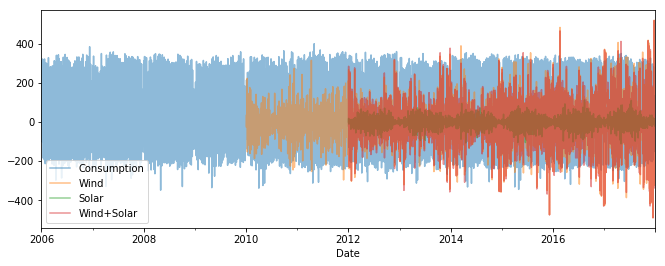

In [376]:
# plotting the first-order differences 
data_first_order_diff[data_columns].plot(figsize = (11,4), alpha = 0.5)

Visual inspection does not show any overlap in seasonality even after removing the trend. So we do not expect the correltion to go much up

In [385]:
data_first_order_diff[data_columns].corr()

,Consumption,Wind,Solar,Wind+Solar
Consumption,1.000000,-0.000071,-0.007408,-0.004634
Wind,-0.000071,1.000000,-0.133274,0.967935
Solar,-0.007408,-0.133274,1.000000,0.119961
Wind+Solar,-0.004634,0.967935,0.119961,1.000000


Since the data for Wind+Solar starts getting collected from 2012, and we see an overlap between orange and red, it might be wortwhile is a correlation exists between these 2 from 2012 to 2018

In [387]:
data_first_order_diff.loc['2012': '2018',['Wind', 'Wind+Solar', 'Consumption']].corr()

,Wind,Wind+Solar,Consumption
Wind,1.000000,0.967935,-0.002904
Wind+Solar,0.967935,1.000000,-0.004634
Consumption,-0.002904,-0.004634,1.000000


### Autocorrelation of the Consumption series

If the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

On the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

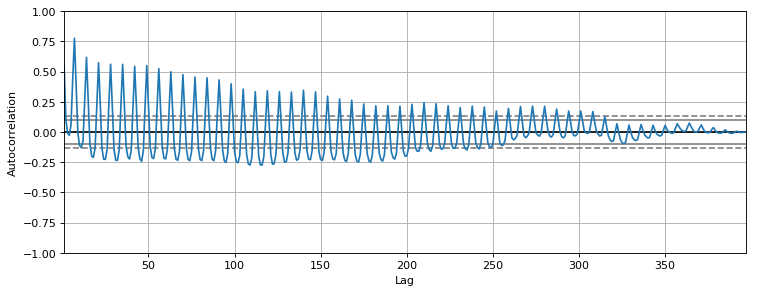

In [396]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(data.loc['2012-01': '2013-01', 'Consumption']);

There is high peak in correlation at 7th day, then again at 14th day, and so on. Which means the time series repeats every 7 days, weekly. This pattern wears off after 3 months (100 days approximately). As you move further away, there's less and less of a correlation.

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. Each spike that rises above or falls below the dashed lines is considered to be statistically significant.

Thus we can be sure the consumptions eries is genuinely autocorelated with a lag of 1 week.

# MISC

## Customize time series plot to start grid lines on each week

In [189]:
import matplotlib.dates as mdates

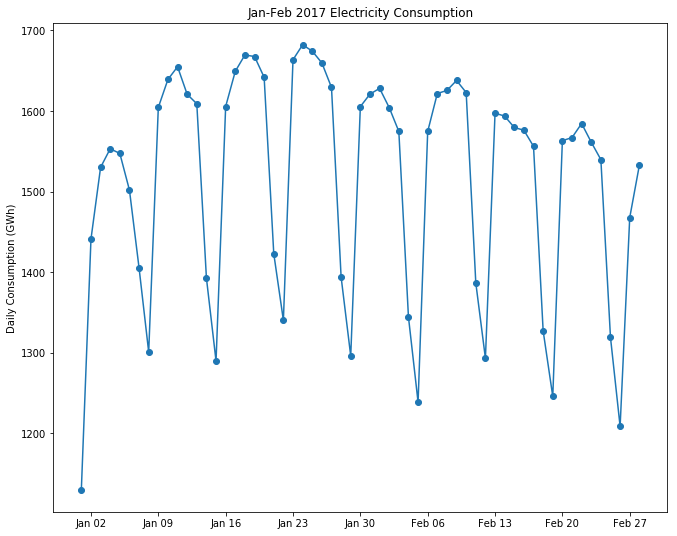

In [198]:
fig, ax = plt.subplots(figsize=(11, 9))
ax.plot(data.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Prediction

In [400]:
data

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [415]:
data_consumption = data[['Consumption']]
data_consumption

,Consumption
Date,
2006-01-01,1069.18400
2006-01-02,1380.52100
2006-01-03,1442.53300
2006-01-04,1457.21700
2006-01-05,1477.13100
...,...
2017-12-27,1263.94091
2017-12-28,1299.86398
2017-12-29,1295.08753


In [416]:
data_consumption['Last_Week'] = data_consumption.shift().copy()
data_consumption

/Users/root947/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Consumption,Last_Week
Date,,
2006-01-01,1069.18400,NaN
2006-01-02,1380.52100,1069.18400
2006-01-03,1442.53300,1380.52100
2006-01-04,1457.21700,1442.53300
2006-01-05,1477.13100,1457.21700
...,...,...
2017-12-27,1263.94091,1130.11683
2017-12-28,1299.86398,1263.94091
2017-12-29,1295.08753,1299.86398


In [417]:
data_consumption = data_consumption.dropna()
data_consumption

,Consumption,Last_Week
Date,,
2006-01-02,1380.52100,1069.18400
2006-01-03,1442.53300,1380.52100
2006-01-04,1457.21700,1442.53300
2006-01-05,1477.13100,1457.21700
2006-01-06,1403.42700,1477.13100
...,...,...
2017-12-27,1263.94091,1130.11683
2017-12-28,1299.86398,1263.94091
2017-12-29,1295.08753,1299.86398


In [418]:
data_consumption['Last_Week_Diff'] = data_consumption['Last_Week'].diff()
data_consumption

/Users/root947/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Consumption,Last_Week,Last_Week_Diff
Date,,,
2006-01-02,1380.52100,1069.18400,NaN
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
2006-01-06,1403.42700,1477.13100,19.91400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


In [419]:
data_consumption = data_consumption.dropna()
data_consumption

,Consumption,Last_Week,Last_Week_Diff
Date,,,
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
2006-01-06,1403.42700,1477.13100,19.91400
2006-01-07,1300.28700,1403.42700,-73.70400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


In [437]:
data_consumption.dtypes

Consumption       float64
Last_Week         float64
Last_Week_Diff    float64
dtype: object

## Spot check algorithms

- Training data = All data minus the last year
- Testing data = Last year

In [445]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.model_selection import TimeSeriesSplit

LR: 0.343747 (0.029773)
NN: 0.392969 (0.153295)
KNN: 0.646307 (0.083185)
RF: 0.625239 (0.078170)
SVR: -0.117944 (0.157755)


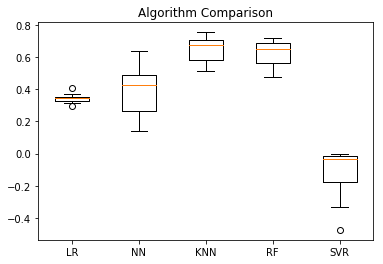

In [465]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

X_train = data_consumption[:'2016'].drop(['Consumption'], axis = 1)
y_train = data_consumption.loc[:'2016', 'Consumption']

# evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
	tscv = TimeSeriesSplit(n_splits=10)
    
	cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


Both KNN and RF perform equally well. But the latter is a bit more easier to explain to stakeholders.

We can continue grid searching to find the best hyperparameters for Random Forest Regressor

## Grid Search RANDOM FOREST hyperparameters

In [515]:
from sklearn.metrics import make_scorer

def rmse(actual, predict):

    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score


rmse_score = make_scorer(rmse, greater_is_better = False)

In [516]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}


tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

print(f"Best root mean square error after tuning is {-best_score}")
print(f"Best model has the following hyperparameters: {best_model}")

Best mean absolute error score after tuning is 90.31053775425676
Best model has the following hyperparameters: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


### Checking to see how well it does on previously unseen data

test data is the last year's data from the original file

In [517]:
X_test = data_consumption['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption.loc['2017', 'Consumption']

In [549]:
rmse_test = rmse(y_test, best_model.predict(X_test))
print("Root mean square error on testing data is %.3f" % (rmse_test))

Root mean square error on testing data is 85.616


In [550]:
rmse_train = rmse(y_train, best_model.predict(X_train))
print("Root mean square error on training data is %.3f" % (rmse_train))

Root mean square error on training data is 74.203


In [521]:
from sklearn.metrics import mean_absolute_error

best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

print(mean_absolute_error(y_test, pred)) # mean absolute error
print(rmse(y_test, pred)) # root mean square error; printed by our function above

55.647561982467494
85.61585184178509


In [529]:
from sklearn.metrics import accuracy_score, r2_score
print('R2: ', r2_score(y_pred = best_model.predict(X_test), y_true = y_test))

R2:  0.729322642038212


### Printing all regression metrics

In [555]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [554]:
y_true = y_test.values
y_pred = best_model.predict(X_test)

In [557]:
regression_results(y_true, y_pred)

explained_variance:  0.732
mean_squared_log_error:  0.0041
r2:  0.7293
MAE:  55.6476
MSE:  7330.0741
RMSE:  85.6159


### Second Order Differencing

In [565]:
data_consumption_2o = data_consumption.copy()

In [566]:
data_consumption_2o['Last-1_Week'] = data_consumption_2o['Last_Week'].shift()
data_consumption_2o = data_consumption_2o.dropna()
data_consumption_2o

,Consumption,Last_Week,Last_Week_Diff,Last-1_Week,Last-1_Week_Diff
Date,,,,,
2006-01-06,1403.42700,1477.13100,19.91400,1457.21700,14.68400
2006-01-07,1300.28700,1403.42700,-73.70400,1477.13100,19.91400
2006-01-08,1207.98500,1300.28700,-103.14000,1403.42700,-73.70400
2006-01-09,1529.32300,1207.98500,-92.30200,1300.28700,-103.14000
2006-01-10,1576.91100,1529.32300,321.33800,1207.98500,-92.30200
...,...,...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345,1111.28338,-30.47392
2017-12-28,1299.86398,1263.94091,133.82408,1130.11683,18.83345
2017-12-29,1295.08753,1299.86398,35.92307,1263.94091,133.82408


In [567]:
data_consumption_2o['Last-1_Week_Diff'] = data_consumption_2o['Last-1_Week'].diff()
data_consumption_2o = data_consumption_2o.dropna()
data_consumption_2o

,Consumption,Last_Week,Last_Week_Diff,Last-1_Week,Last-1_Week_Diff
Date,,,,,
2006-01-07,1300.28700,1403.42700,-73.70400,1477.13100,19.91400
2006-01-08,1207.98500,1300.28700,-103.14000,1403.42700,-73.70400
2006-01-09,1529.32300,1207.98500,-92.30200,1300.28700,-103.14000
2006-01-10,1576.91100,1529.32300,321.33800,1207.98500,-92.30200
2006-01-11,1577.17600,1576.91100,47.58800,1529.32300,321.33800
...,...,...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345,1111.28338,-30.47392
2017-12-28,1299.86398,1263.94091,133.82408,1130.11683,18.83345
2017-12-29,1295.08753,1299.86398,35.92307,1263.94091,133.82408


### Resetting the train and test sets

In [568]:
X_train_2o = data_consumption_2o[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o = data_consumption_2o.loc[:'2016', 'Consumption']

### Checking to see if the best random forest model on new data is better than prev model

In [571]:


from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}


tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train_2o, y_train_2o)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

print(f"Best root mean square error after tuning is {-best_score}")
print(f"Best model has the following hyperparameters: {best_model}")

Best root mean square error after tuning is 69.99056321335229
Best model has the following hyperparameters: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


### Metrics on test set

In [572]:
X_test = data_consumption_2o['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o.loc['2017', 'Consumption']

y_true = y_test.values
y_pred = best_model.predict(X_test)

In [573]:
regression_results(y_true, y_pred)

explained_variance:  0.8383
mean_squared_log_error:  0.0025
r2:  0.8383
MAE:  40.6919
MSE:  4377.8632
RMSE:  66.1654


## We have significantly brought down the MAE and RMSE values.  :-)

In [ ]:
# Let us see if adding the Value of Solar production is beneficial in some way to predicting electricity consumption

In [579]:
data_consumption_2o_solar = data_consumption_2o.join(data[['Solar']])
data_consumption_2o_solar

,Consumption,Last_Week,Last_Week_Diff,Last-1_Week,Last-1_Week_Diff,Solar
Date,,,,,,
2006-01-07,1300.28700,1403.42700,-73.70400,1477.13100,19.91400,NaN
2006-01-08,1207.98500,1300.28700,-103.14000,1403.42700,-73.70400,NaN
2006-01-09,1529.32300,1207.98500,-92.30200,1300.28700,-103.14000,NaN
2006-01-10,1576.91100,1529.32300,321.33800,1207.98500,-92.30200,NaN
2006-01-11,1577.17600,1576.91100,47.58800,1529.32300,321.33800,NaN
...,...,...,...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345,1111.28338,-30.47392,16.530
2017-12-28,1299.86398,1263.94091,133.82408,1130.11683,18.83345,14.162
2017-12-29,1295.08753,1299.86398,35.92307,1263.94091,133.82408,29.854


In [582]:
data_consumption_2o_solar = data_consumption_2o_solar.dropna()
data_consumption_2o_solar

,Consumption,Last_Week,Last_Week_Diff,Last-1_Week,Last-1_Week_Diff,Solar
Date,,,,,,
2012-01-01,948.12800,1077.62500,-122.24100,1199.86600,-27.02200,6.587
2012-01-02,1269.58100,948.12800,-129.49700,1077.62500,-122.24100,6.574
2012-01-03,1334.74500,1269.58100,321.45300,948.12800,-129.49700,24.679
2012-01-04,1347.13600,1334.74500,65.16400,1269.58100,321.45300,14.681
2012-01-05,1376.65800,1347.13600,12.39100,1334.74500,65.16400,5.071
...,...,...,...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345,1111.28338,-30.47392,16.530
2017-12-28,1299.86398,1263.94091,133.82408,1130.11683,18.83345,14.162
2017-12-29,1295.08753,1299.86398,35.92307,1263.94091,133.82408,29.854


In [611]:
X_train_2o_solar = data_consumption_2o_solar[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o_solar = data_consumption_2o_solar.loc[:'2016', 'Consumption']


In [584]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}


tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train_2o_solar, y_train_2o_solar)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

print(f"Best root mean square error after tuning is {-best_score}")
print(f"Best model has the following hyperparameters: {best_model}")

Best root mean square error after tuning is 71.56250447634045
Best model has the following hyperparameters: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [586]:
X_test = data_consumption_2o_solar['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o_solar.loc['2017', 'Consumption']

y_true = y_test.values
y_pred = best_model.predict(X_test)

regression_results(y_true, y_pred)

explained_variance:  0.8428
mean_squared_log_error:  0.0024
r2:  0.8427
MAE:  38.8449
MSE:  4258.723
RMSE:  65.2589


## Voila, the model is even better now!

## Variable Importance Plot

In [593]:
imp = best_model.feature_importances_
features = X_train_2o_solar.columns

In [590]:
indices = np.argsort(imp)
indices

array([4, 2, 3, 1, 0])

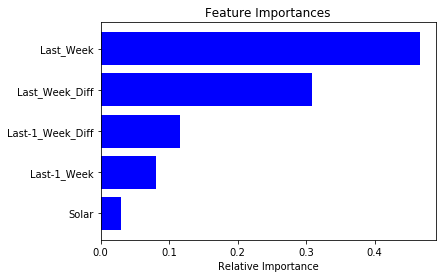

In [594]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Incorporating the knowledge that our data has weekly seasonality

In [609]:
data_consumption_2o_solar_weeklyShift = data_consumption_2o_solar.copy()
data_consumption_2o_solar_weeklyShift['Yesterday'] = data_consumption_2o_solar['Consumption'].shift(7)
data_consumption_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.dropna()
data_consumption_2o_solar_weeklyShift.head(12)

,Consumption,Last_Week,Last_Week_Diff,Last-1_Week,Last-1_Week_Diff,Solar,Yesterday
Date,,,,,,,
2012-01-08,1103.383,1175.688,-115.527,1291.215,-85.443,8.440,948.128
2012-01-09,1443.371,1103.383,-72.305,1175.688,-115.527,5.264,1269.581
2012-01-10,1434.631,1443.371,339.988,1103.383,-72.305,17.827,1334.745
2012-01-11,1449.768,1434.631,-8.740,1443.371,339.988,10.849,1347.136
2012-01-12,1442.448,1449.768,15.137,1434.631,-8.740,18.023,1376.658
2012-01-13,1403.402,1442.448,-7.320,1449.768,15.137,18.778,1291.215
2012-01-14,1203.165,1403.402,-39.046,1442.448,-7.320,26.772,1175.688
2012-01-15,1150.920,1203.165,-200.237,1403.402,-39.046,36.609,1103.383
2012-01-16,1487.782,1150.920,-52.245,1203.165,-200.237,39.682,1443.371


In [612]:
X_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.loc[:'2016', 'Consumption']

In [613]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}


tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train_2o_solar_weeklyShift, y_train_2o_solar_weeklyShift)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

print(f"Best root mean square error after tuning is {-best_score}")
print(f"Best model has the following hyperparameters: {best_model}")

Best root mean square error after tuning is 62.44486858753028
Best model has the following hyperparameters: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [614]:
X_test = data_consumption_2o_solar_weeklyShift['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o_solar_weeklyShift.loc['2017', 'Consumption']

y_true = y_test.values
y_pred = best_model.predict(X_test)

regression_results(y_true, y_pred)

explained_variance:  0.8905
mean_squared_log_error:  0.0017
r2:  0.89
MAE:  31.7445
MSE:  2978.9315
RMSE:  54.5796


## I THINK YOU GET THE IDEA NOW!

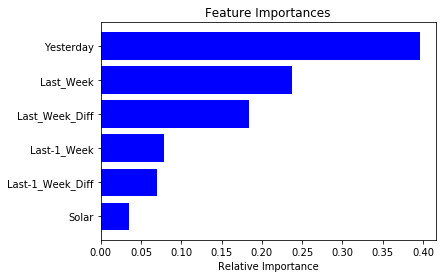

In [615]:
imp = best_model.feature_importances_
features = X_train_2o_solar_weeklyShift.columns

indices = np.argsort(imp)

plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### NOTE: Yesterday here means last week and last week means yesterday

# Modeling the seasonal component directly

In [643]:
from numpy import polyfit

In [641]:
X = [i%365 for i in range(0, len(data['Consumption'].values))]
y = data['Consumption'].values

In [647]:
coef = polyfit(X, y, 4) # degree = 4

In [648]:
print('Coefficients: %s' % coef)

Coefficients: [-4.94388194e-07  3.56618507e-04 -7.65506847e-02  4.32321335e+00
  1.36871867e+03]


In [650]:
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(4):
		value += X[i]**(4-d) * coef[d]
	curve.append(value)

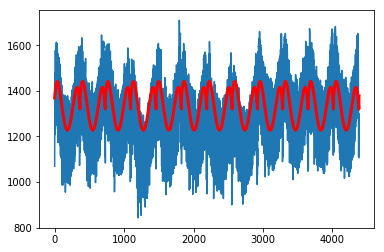

In [652]:
# plot curve over original data
plt.plot(data['Consumption'].values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

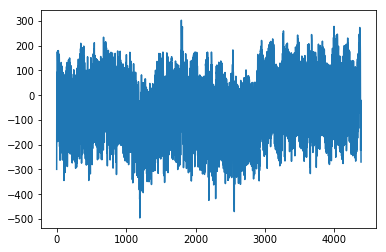

In [654]:
# create seasonally adjusted version of dataset
values = data['Consumption'].values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
plt.plot(diff)
plt.show()

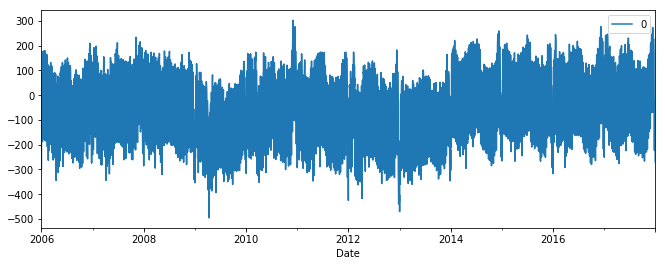

In [659]:
pd.DataFrame(diff).set_index(data.index).plot(figsize = (11,4))

### Seasonally adjusted version of dataset